Security threads
- DoS attack
    - caused by unchecked or unrestricted resource utilizations
- sensitive data leaks
    - lack of encryption
    - information reduction
- code corruption
    - lack of encapsulation or immutability
- code injections
    - lack of nput value validation and sanitation    

<img src=attachment:image.png width=600></img>
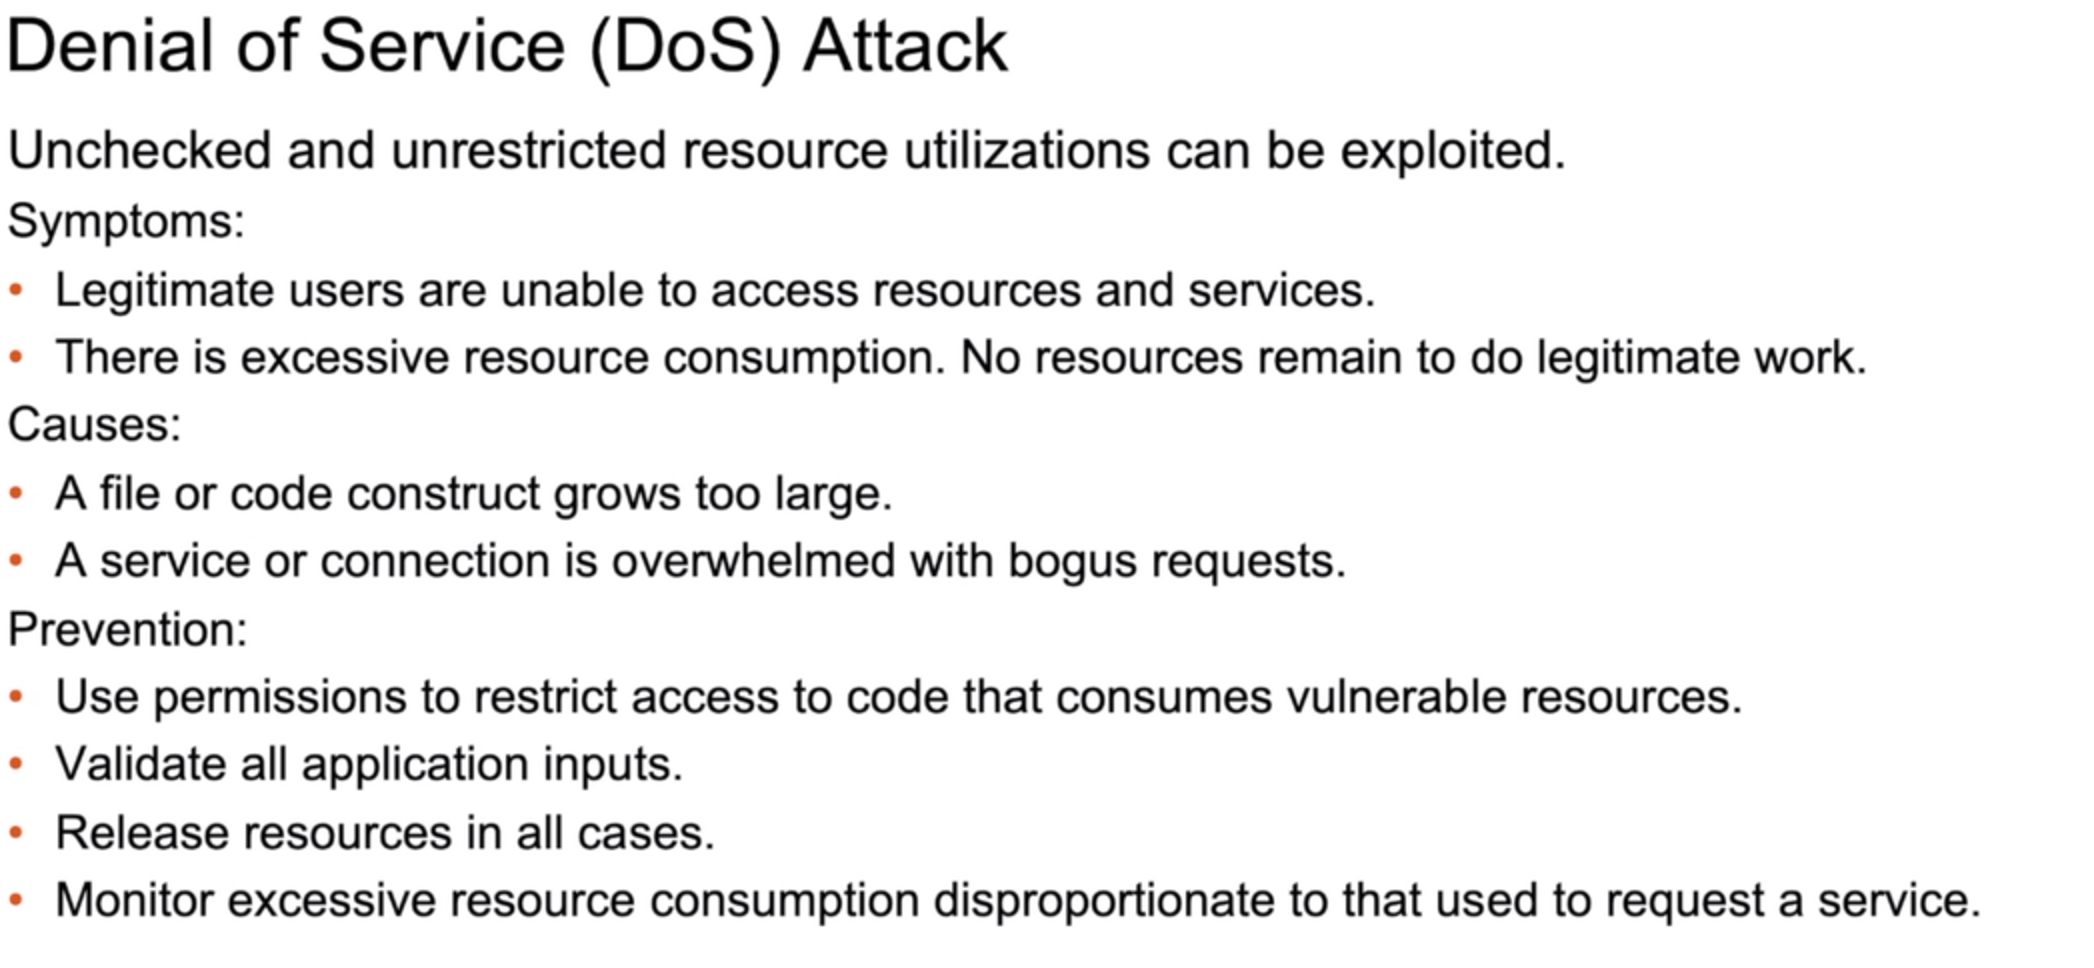

## Security Policies
- restrict access to code and resources
- config via _Security descriptor file_
    - general settings
    - reference to keystore
    - reference to security policy files
<img src=attachment:image.png width=500></img>
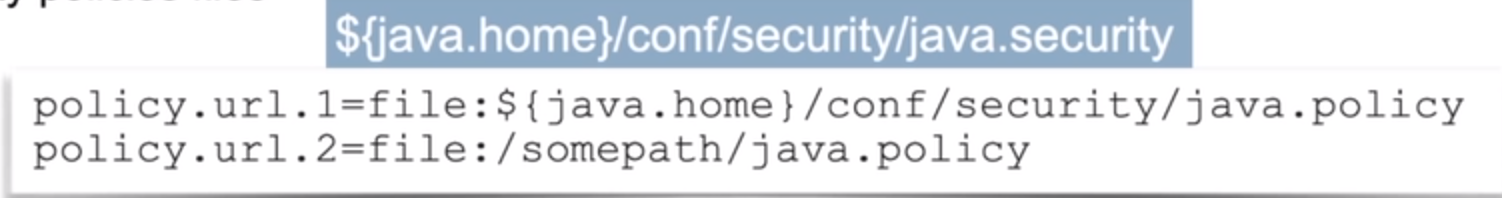

- configures
    - location of code (URL or folder)
    - code signed with signature
    - access to classes and resources
<img src=attachment:image.png width=550></img>
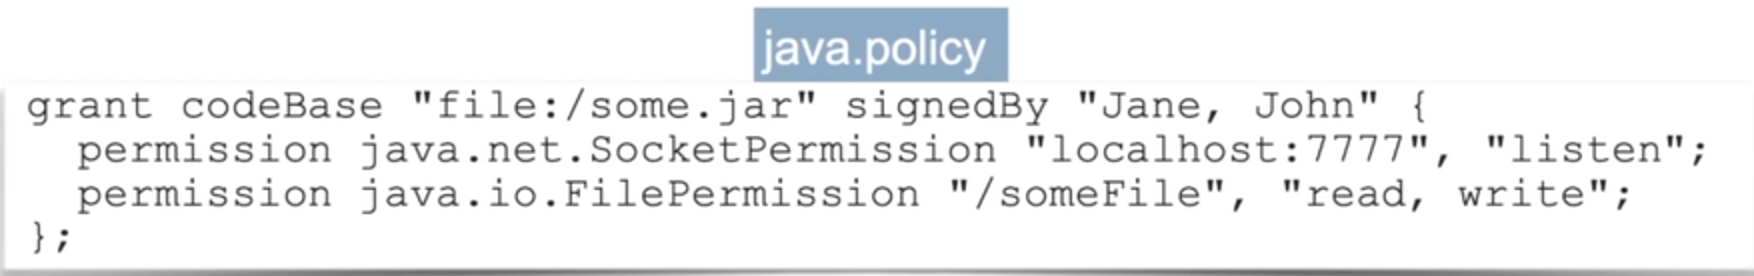

## Controll Access Using Permissions
- many types of permissions available
- all permissions decent from `java.security.Permission`
- permissions are set using policy files (see above)
- check permissions before performing an action
- `AccessControlException` if access is denied
<img src=attachment:image.png width=600></img>
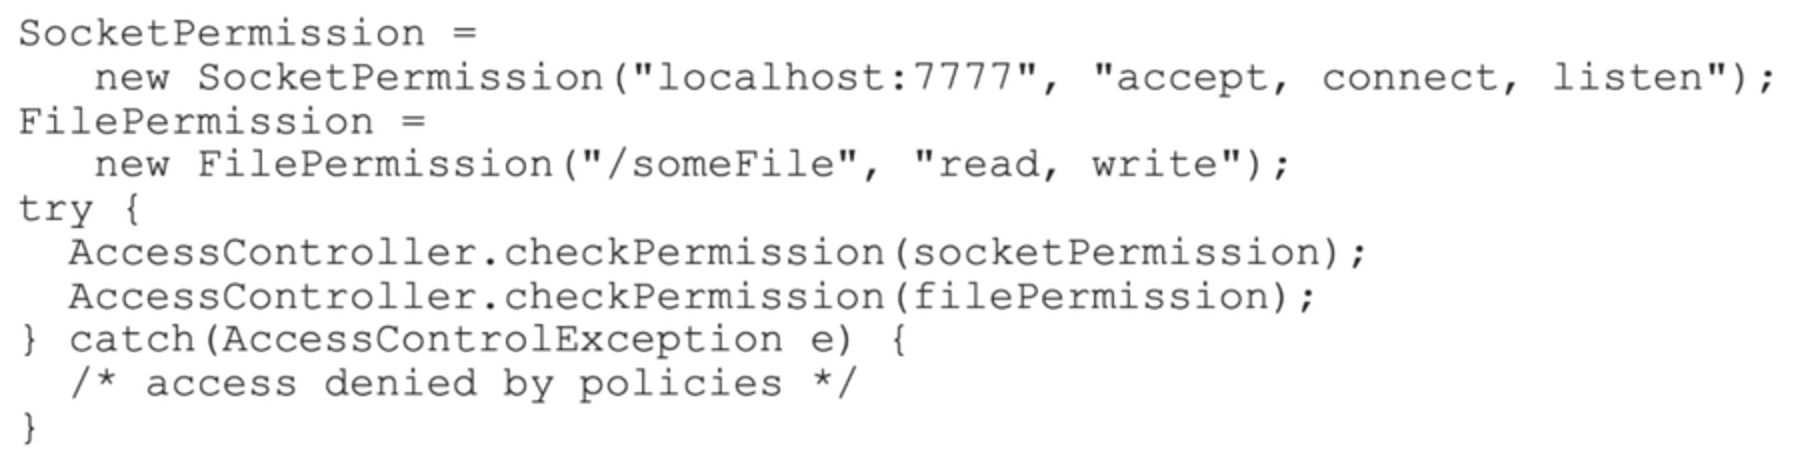

## Execute Privileged Code
- using method `AccessController.doPrivileged(...)`
<img src=attachment:image.png width=500></img>
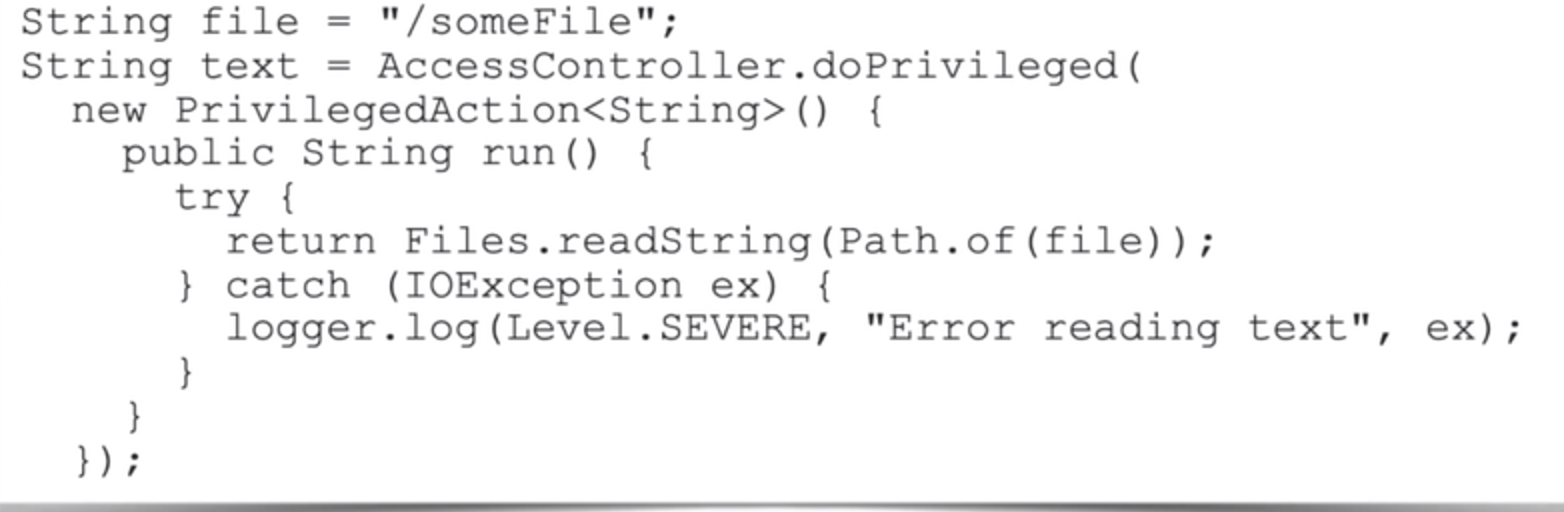

## Secury File System And IO Operations
- protect against directory traversal attacks
    - avoid usage of relative path
    - convert to canonical form via
        - `normalize`
        - `toRealPath(...)`
- DoS attacks (too much data or too much memory)
    - verify expected file size or stream length
    - monitor IO operations to detect excessive use
    - terminate operations that process excessive amout of data
    - time out lengthy operations
- Deserialization
    - attention: bypasses object generation via constructor
    - deserialization loads data from external, untrusted sources
    - validate data after deserialization

## Best Practices For Protecting your Code
- enforce encapsulation
    - use JPMS to protect classes from reflection
    - encapsualte with most restrictive permission
- make objections as immutable as possible
    - `final` can still reference an object which is itself mutable
    - operate on cloned replicas
- do not break subclass assumptions about inherited code
    - beware of changes to superclass method implementations
        - overriden methods should not contradict the logic of the parent
    - beware of introduction of new methods by a superclass
        - child automatically inherits new parent methods - Is this my intention?
- ! design classes and methods for inheritance or declare them `final` or `private`
    - non-final and non-private methods can be overriden by attacker
    - use factory methods to perform validations before calling the construcor
    - ! don't invoke overridable methods from constructor
- protect byte-code against tampering and dangerous behaviour
    - many enviroments may change or modify Java byte code
    - beware of `-Xverify:none` and `noverify` which _disable_ byte-code verification !

## Example Prevent Malicious Subclass
- the constructor should not call methods a subclass can override
- work arounds:
    - `final` on class or methods prevents overriding with own subclass
    - private constructor + factory method

In [4]:
// object can only be constructed via factory method -> no override possible
public class FoodOrder {
    private String item;
    private int count;

    private FoodOrder(String item, int count) {
        setItem(item);
        setCount(count);
    }
    
    public static FoodOrder of(String item, int count) {
        return new FoodOrder(item, count);
    }
    
    public String getItem() { return item; }
    public void setItem(String item) { this.item = item; }
    public int getCount() { return count; }
    public void setCount(int count) { this.count = count; }
    
    public String toString() {
        return String.format("item: %s, count: %d", item, count);
    }
}

In [2]:
FoodOrder.of("apple", 2)

item: apple, count: 2

<img src=attachment:image.png width=700></img>
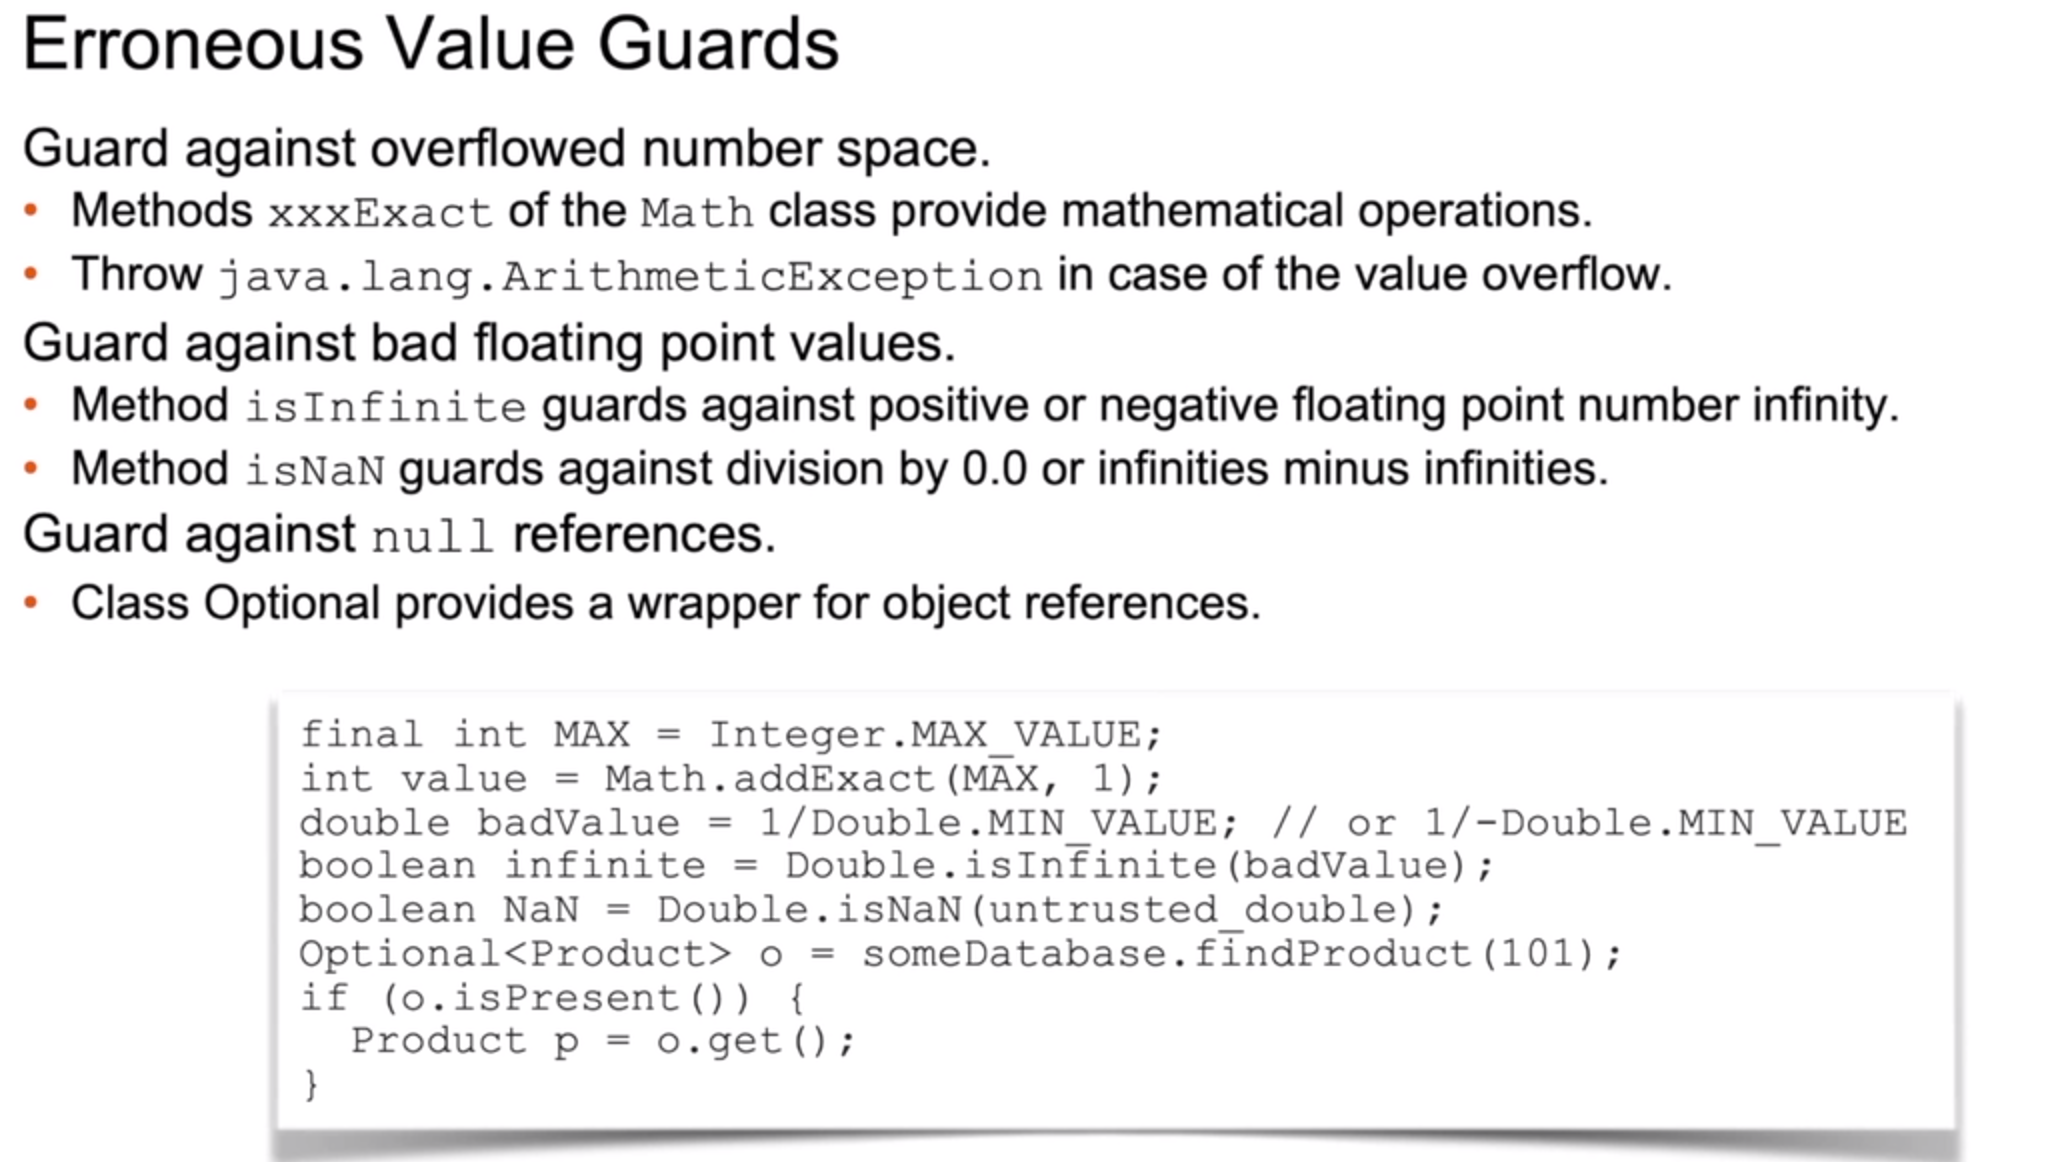

## Protect Sensitive Data
- consider scrambling such data
- clean if from memory as soon as possible
- remove if from exceptions
- do not serialize it
- do not write it to logs

In [5]:
import java.security.*;

public static String byteArrayToHex(byte[] a) {
   StringBuilder sb = new StringBuilder(a.length * 2);
   for(byte b: a)
      sb.append(String.format("%02x", b));
   return sb.toString();
}

In [8]:
MessageDigest md = MessageDigest.getInstance("SHA-256");
byte[] digist = md.digest("hello world".getBytes());
byteArrayToHex(digist)

b94d27b9934d3e08a52e52d7da7dabfac484efe37a5380ee9088f7ace2efcde9

- encrypt/ decrypt values
- uses `java.crypto` API
- support different types of encryption algorithms


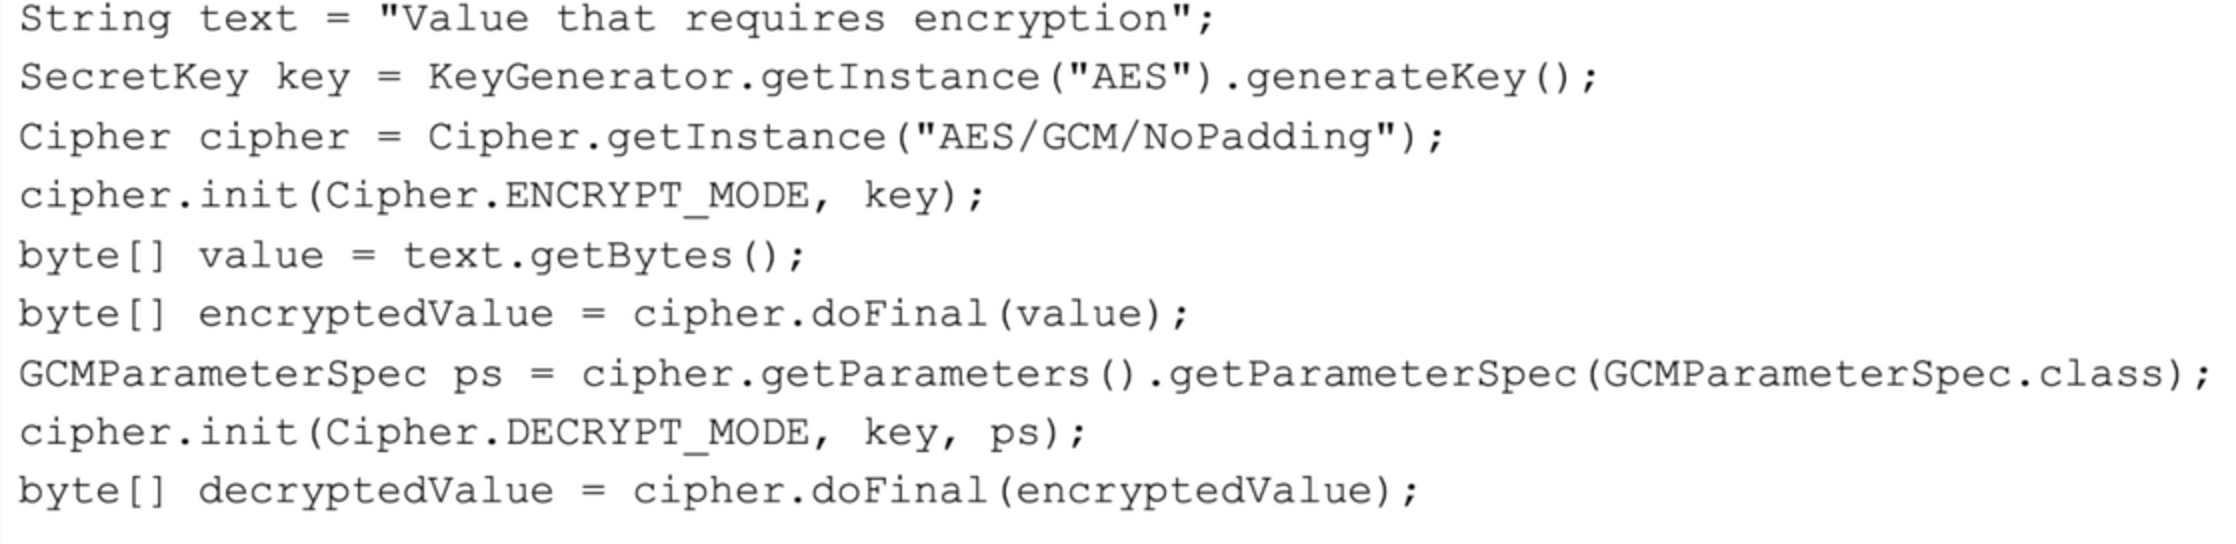

- example generates `SecretKey` on the fly

## Prevent SQL Injection
- use `PreparedStatement`
- or `Statement` with `enquoteLiteral(param)` to sanitize parameter value

## Prevent Javascript Injections
- validate + sanitize every value processed by the browser
- consider OWASP lib to automate this

## Prevent XML Injections
- instruct XML parser to stop processing documents when unsafe constructs are detected (enable FEATURE_SECURE_PROCESSING)
- use OWASP to sanitize XML input


<img src=attachment:image.png width=600></img>
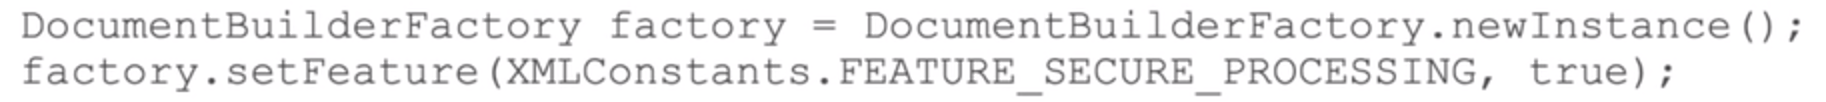